## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              101.8
Date:                Tue, 17 May 2022   Prob (F-statistic):                   1.15e-116
Time:                        20:20:47   Log-Likelihood:                         -279.65
No. Observations:                 404   AIC:                                      585.3
Df Residuals:                     391   BIC:                                      637.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

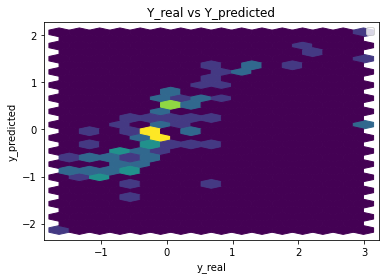

Performance Metrics
Mean Squared Error: 0.3722202544702175
Mean Absolute Error: 0.4128240366213934
Manhattan distance: 42.108051735382105
Euclidean distance: 6.161693432487711


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print(mae_cb)

Learning rate set to 0.033215


0:	learn: 0.9920233	total: 58.9ms	remaining: 58.9s
1:	learn: 0.9719023	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9516909	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9344368	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9167850	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8994355	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8816440	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8647471	total: 65.6ms	remaining: 8.14s
8:	learn: 0.8484716	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8314245	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8159307	total: 68.3ms	remaining: 6.14s
11:	learn: 0.8004350	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7842920	total: 70ms	remaining: 5.31s
13:	learn: 0.7686938	total: 70.8ms	remaining: 4.99s
14:	learn: 0.7562020	total: 71.7ms	remaining: 4.71s
15:	learn: 0.7418246	total: 72.5ms	remaining: 4.46s
16:	learn: 0.7288297	total: 73.4ms	remaining: 4.24s
17:	learn: 0.7155441	total: 74.2ms	remaining: 4.04s
18:	learn: 0.7032817	total: 75ms	remaining: 3.87s
19:	learn: 0.6911841	total

31:	learn: 0.5645760	total: 85.4ms	remaining: 2.58s
32:	learn: 0.5567684	total: 86.3ms	remaining: 2.53s
33:	learn: 0.5486138	total: 87.1ms	remaining: 2.47s
34:	learn: 0.5404718	total: 87.9ms	remaining: 2.42s
35:	learn: 0.5322219	total: 88.6ms	remaining: 2.37s
36:	learn: 0.5249051	total: 89.4ms	remaining: 2.33s
37:	learn: 0.5181395	total: 90.3ms	remaining: 2.28s
38:	learn: 0.5107511	total: 91ms	remaining: 2.24s
39:	learn: 0.5042540	total: 91.8ms	remaining: 2.2s
40:	learn: 0.4985784	total: 92.6ms	remaining: 2.17s
41:	learn: 0.4917835	total: 93.4ms	remaining: 2.13s
42:	learn: 0.4856655	total: 94.1ms	remaining: 2.1s
43:	learn: 0.4786965	total: 94.9ms	remaining: 2.06s
44:	learn: 0.4727779	total: 95.6ms	remaining: 2.03s
45:	learn: 0.4666606	total: 97.2ms	remaining: 2.02s
46:	learn: 0.4607375	total: 98ms	remaining: 1.99s
47:	learn: 0.4549569	total: 98.7ms	remaining: 1.96s
48:	learn: 0.4499994	total: 99.4ms	remaining: 1.93s
49:	learn: 0.4448864	total: 100ms	remaining: 1.9s
50:	learn: 0.4393144

119:	learn: 0.2698381	total: 159ms	remaining: 1.16s
120:	learn: 0.2683669	total: 160ms	remaining: 1.16s
121:	learn: 0.2674468	total: 160ms	remaining: 1.15s
122:	learn: 0.2663824	total: 161ms	remaining: 1.15s
123:	learn: 0.2653465	total: 162ms	remaining: 1.14s
124:	learn: 0.2640761	total: 163ms	remaining: 1.14s
125:	learn: 0.2626963	total: 164ms	remaining: 1.14s
126:	learn: 0.2617901	total: 165ms	remaining: 1.13s
127:	learn: 0.2602194	total: 165ms	remaining: 1.13s
128:	learn: 0.2591824	total: 166ms	remaining: 1.12s
129:	learn: 0.2578902	total: 167ms	remaining: 1.12s
130:	learn: 0.2567412	total: 168ms	remaining: 1.11s
131:	learn: 0.2557388	total: 169ms	remaining: 1.11s
132:	learn: 0.2546657	total: 169ms	remaining: 1.1s
133:	learn: 0.2537666	total: 170ms	remaining: 1.1s
134:	learn: 0.2528001	total: 171ms	remaining: 1.09s
135:	learn: 0.2518035	total: 172ms	remaining: 1.09s
136:	learn: 0.2508419	total: 173ms	remaining: 1.09s
137:	learn: 0.2499799	total: 173ms	remaining: 1.08s
138:	learn: 0.

158:	learn: 0.2327431	total: 191ms	remaining: 1.01s
159:	learn: 0.2320628	total: 191ms	remaining: 1s
160:	learn: 0.2315192	total: 192ms	remaining: 1s
161:	learn: 0.2307895	total: 193ms	remaining: 999ms
162:	learn: 0.2301622	total: 194ms	remaining: 997ms
163:	learn: 0.2294002	total: 195ms	remaining: 993ms
164:	learn: 0.2287828	total: 196ms	remaining: 990ms
165:	learn: 0.2282665	total: 197ms	remaining: 987ms
166:	learn: 0.2274857	total: 197ms	remaining: 984ms
167:	learn: 0.2265487	total: 198ms	remaining: 981ms
168:	learn: 0.2259493	total: 199ms	remaining: 977ms
169:	learn: 0.2253046	total: 200ms	remaining: 976ms
170:	learn: 0.2246746	total: 201ms	remaining: 973ms
171:	learn: 0.2239416	total: 202ms	remaining: 971ms
172:	learn: 0.2232058	total: 203ms	remaining: 969ms
173:	learn: 0.2225199	total: 203ms	remaining: 965ms
174:	learn: 0.2217455	total: 204ms	remaining: 962ms
175:	learn: 0.2211199	total: 205ms	remaining: 960ms
176:	learn: 0.2206564	total: 206ms	remaining: 957ms
177:	learn: 0.2198

228:	learn: 0.1923332	total: 248ms	remaining: 835ms
229:	learn: 0.1916188	total: 249ms	remaining: 833ms
230:	learn: 0.1909508	total: 250ms	remaining: 831ms
231:	learn: 0.1902944	total: 250ms	remaining: 829ms
232:	learn: 0.1898210	total: 251ms	remaining: 827ms
233:	learn: 0.1892116	total: 252ms	remaining: 825ms
234:	learn: 0.1886908	total: 253ms	remaining: 824ms
235:	learn: 0.1880822	total: 254ms	remaining: 822ms
236:	learn: 0.1874414	total: 255ms	remaining: 821ms
237:	learn: 0.1870183	total: 256ms	remaining: 819ms
238:	learn: 0.1867227	total: 257ms	remaining: 817ms
239:	learn: 0.1861962	total: 258ms	remaining: 816ms
240:	learn: 0.1858327	total: 258ms	remaining: 814ms
241:	learn: 0.1854796	total: 259ms	remaining: 812ms
242:	learn: 0.1850716	total: 260ms	remaining: 810ms
243:	learn: 0.1846065	total: 261ms	remaining: 808ms
244:	learn: 0.1842170	total: 262ms	remaining: 806ms
245:	learn: 0.1838165	total: 262ms	remaining: 804ms
246:	learn: 0.1834627	total: 263ms	remaining: 802ms
247:	learn: 

260:	learn: 0.1772390	total: 274ms	remaining: 777ms
261:	learn: 0.1768166	total: 275ms	remaining: 776ms
262:	learn: 0.1763627	total: 276ms	remaining: 774ms
263:	learn: 0.1760157	total: 277ms	remaining: 772ms
264:	learn: 0.1755968	total: 278ms	remaining: 771ms
265:	learn: 0.1751015	total: 279ms	remaining: 770ms
266:	learn: 0.1745662	total: 280ms	remaining: 768ms
267:	learn: 0.1741497	total: 281ms	remaining: 766ms
268:	learn: 0.1738466	total: 281ms	remaining: 764ms
269:	learn: 0.1734091	total: 282ms	remaining: 763ms
270:	learn: 0.1730303	total: 283ms	remaining: 761ms
271:	learn: 0.1725886	total: 284ms	remaining: 760ms
272:	learn: 0.1722152	total: 285ms	remaining: 758ms
273:	learn: 0.1718749	total: 285ms	remaining: 756ms
274:	learn: 0.1714968	total: 286ms	remaining: 755ms
275:	learn: 0.1712276	total: 287ms	remaining: 753ms
276:	learn: 0.1708028	total: 288ms	remaining: 751ms
277:	learn: 0.1704511	total: 289ms	remaining: 751ms
278:	learn: 0.1698705	total: 290ms	remaining: 749ms
279:	learn: 

348:	learn: 0.1472481	total: 349ms	remaining: 651ms
349:	learn: 0.1470271	total: 350ms	remaining: 650ms
350:	learn: 0.1466029	total: 351ms	remaining: 649ms
351:	learn: 0.1462320	total: 352ms	remaining: 647ms
352:	learn: 0.1461841	total: 353ms	remaining: 646ms
353:	learn: 0.1458709	total: 354ms	remaining: 645ms
354:	learn: 0.1456602	total: 354ms	remaining: 644ms
355:	learn: 0.1452266	total: 355ms	remaining: 643ms
356:	learn: 0.1449194	total: 356ms	remaining: 641ms
357:	learn: 0.1446473	total: 357ms	remaining: 640ms
358:	learn: 0.1441920	total: 358ms	remaining: 638ms
359:	learn: 0.1437289	total: 358ms	remaining: 637ms
360:	learn: 0.1436766	total: 359ms	remaining: 636ms
361:	learn: 0.1436255	total: 360ms	remaining: 635ms
362:	learn: 0.1434797	total: 361ms	remaining: 633ms
363:	learn: 0.1430890	total: 362ms	remaining: 632ms
364:	learn: 0.1426500	total: 363ms	remaining: 631ms
365:	learn: 0.1423673	total: 363ms	remaining: 630ms
366:	learn: 0.1423260	total: 364ms	remaining: 628ms
367:	learn: 

385:	learn: 0.1371778	total: 381ms	remaining: 606ms
386:	learn: 0.1368598	total: 382ms	remaining: 605ms
387:	learn: 0.1365565	total: 383ms	remaining: 604ms
388:	learn: 0.1362554	total: 384ms	remaining: 603ms
389:	learn: 0.1358527	total: 385ms	remaining: 601ms
390:	learn: 0.1355482	total: 385ms	remaining: 600ms
391:	learn: 0.1353448	total: 386ms	remaining: 599ms
392:	learn: 0.1352094	total: 387ms	remaining: 597ms
393:	learn: 0.1348325	total: 388ms	remaining: 596ms
394:	learn: 0.1343825	total: 388ms	remaining: 595ms
395:	learn: 0.1340881	total: 389ms	remaining: 594ms
396:	learn: 0.1338031	total: 390ms	remaining: 592ms
397:	learn: 0.1334841	total: 391ms	remaining: 591ms
398:	learn: 0.1332462	total: 392ms	remaining: 590ms
399:	learn: 0.1329451	total: 392ms	remaining: 589ms
400:	learn: 0.1328004	total: 393ms	remaining: 588ms
401:	learn: 0.1325117	total: 394ms	remaining: 586ms
402:	learn: 0.1322274	total: 395ms	remaining: 585ms
403:	learn: 0.1319651	total: 396ms	remaining: 584ms
404:	learn: 

452:	learn: 0.1219018	total: 438ms	remaining: 528ms
453:	learn: 0.1216667	total: 439ms	remaining: 527ms
454:	learn: 0.1214344	total: 439ms	remaining: 526ms
455:	learn: 0.1213440	total: 440ms	remaining: 525ms
456:	learn: 0.1210914	total: 441ms	remaining: 524ms
457:	learn: 0.1210650	total: 442ms	remaining: 523ms
458:	learn: 0.1208243	total: 443ms	remaining: 522ms
459:	learn: 0.1205528	total: 443ms	remaining: 521ms
460:	learn: 0.1203406	total: 444ms	remaining: 519ms
461:	learn: 0.1203158	total: 445ms	remaining: 518ms
462:	learn: 0.1200928	total: 446ms	remaining: 517ms
463:	learn: 0.1199179	total: 446ms	remaining: 516ms
464:	learn: 0.1198970	total: 447ms	remaining: 515ms
465:	learn: 0.1197484	total: 448ms	remaining: 513ms
466:	learn: 0.1195738	total: 449ms	remaining: 512ms
467:	learn: 0.1193237	total: 450ms	remaining: 511ms
468:	learn: 0.1191204	total: 451ms	remaining: 510ms
469:	learn: 0.1188465	total: 451ms	remaining: 509ms
470:	learn: 0.1185590	total: 452ms	remaining: 508ms
471:	learn: 

485:	learn: 0.1158565	total: 464ms	remaining: 491ms
486:	learn: 0.1156386	total: 465ms	remaining: 490ms
487:	learn: 0.1155386	total: 466ms	remaining: 489ms
488:	learn: 0.1154219	total: 467ms	remaining: 488ms
489:	learn: 0.1152312	total: 468ms	remaining: 487ms
490:	learn: 0.1150036	total: 468ms	remaining: 486ms
491:	learn: 0.1147529	total: 469ms	remaining: 484ms
492:	learn: 0.1145201	total: 470ms	remaining: 483ms
493:	learn: 0.1144991	total: 471ms	remaining: 482ms
494:	learn: 0.1143338	total: 472ms	remaining: 481ms
495:	learn: 0.1140661	total: 473ms	remaining: 480ms
496:	learn: 0.1139287	total: 473ms	remaining: 479ms
497:	learn: 0.1137058	total: 474ms	remaining: 478ms
498:	learn: 0.1133718	total: 475ms	remaining: 477ms
499:	learn: 0.1133497	total: 476ms	remaining: 476ms
500:	learn: 0.1130862	total: 477ms	remaining: 475ms
501:	learn: 0.1130638	total: 477ms	remaining: 473ms
502:	learn: 0.1129577	total: 478ms	remaining: 472ms
503:	learn: 0.1129364	total: 479ms	remaining: 471ms
504:	learn: 

576:	learn: 0.1006070	total: 538ms	remaining: 395ms
577:	learn: 0.1004305	total: 539ms	remaining: 394ms
578:	learn: 0.1002949	total: 540ms	remaining: 393ms
579:	learn: 0.1002219	total: 541ms	remaining: 392ms
580:	learn: 0.1001576	total: 541ms	remaining: 391ms
581:	learn: 0.1001414	total: 542ms	remaining: 390ms
582:	learn: 0.1001261	total: 543ms	remaining: 388ms
583:	learn: 0.1000046	total: 544ms	remaining: 387ms
584:	learn: 0.0999898	total: 545ms	remaining: 386ms
585:	learn: 0.0998098	total: 545ms	remaining: 385ms
586:	learn: 0.0996815	total: 546ms	remaining: 384ms
587:	learn: 0.0995595	total: 547ms	remaining: 383ms
588:	learn: 0.0993590	total: 548ms	remaining: 382ms
589:	learn: 0.0991496	total: 549ms	remaining: 381ms
590:	learn: 0.0991327	total: 549ms	remaining: 380ms
591:	learn: 0.0989699	total: 550ms	remaining: 379ms
592:	learn: 0.0988064	total: 551ms	remaining: 378ms
593:	learn: 0.0986132	total: 552ms	remaining: 377ms
594:	learn: 0.0984143	total: 553ms	remaining: 376ms
595:	learn: 

616:	learn: 0.0954041	total: 571ms	remaining: 354ms
617:	learn: 0.0952295	total: 572ms	remaining: 354ms
618:	learn: 0.0951200	total: 573ms	remaining: 353ms
619:	learn: 0.0949464	total: 574ms	remaining: 352ms
620:	learn: 0.0947552	total: 574ms	remaining: 351ms
621:	learn: 0.0946506	total: 575ms	remaining: 350ms
622:	learn: 0.0945654	total: 576ms	remaining: 349ms
623:	learn: 0.0944494	total: 577ms	remaining: 348ms
624:	learn: 0.0942868	total: 578ms	remaining: 347ms
625:	learn: 0.0940798	total: 579ms	remaining: 346ms
626:	learn: 0.0939491	total: 580ms	remaining: 345ms
627:	learn: 0.0937385	total: 581ms	remaining: 344ms
628:	learn: 0.0935575	total: 582ms	remaining: 343ms
629:	learn: 0.0933853	total: 582ms	remaining: 342ms
630:	learn: 0.0933302	total: 583ms	remaining: 341ms
631:	learn: 0.0931528	total: 584ms	remaining: 340ms
632:	learn: 0.0930702	total: 585ms	remaining: 339ms
633:	learn: 0.0928885	total: 586ms	remaining: 338ms
634:	learn: 0.0927072	total: 586ms	remaining: 337ms
635:	learn: 

685:	learn: 0.0863978	total: 628ms	remaining: 287ms
686:	learn: 0.0863567	total: 628ms	remaining: 286ms
687:	learn: 0.0862485	total: 629ms	remaining: 285ms
688:	learn: 0.0861498	total: 630ms	remaining: 284ms
689:	learn: 0.0860017	total: 631ms	remaining: 283ms
690:	learn: 0.0859294	total: 632ms	remaining: 282ms
691:	learn: 0.0857329	total: 633ms	remaining: 282ms
692:	learn: 0.0855760	total: 633ms	remaining: 281ms
693:	learn: 0.0855027	total: 634ms	remaining: 280ms
694:	learn: 0.0853955	total: 635ms	remaining: 279ms
695:	learn: 0.0852354	total: 636ms	remaining: 278ms
696:	learn: 0.0850736	total: 637ms	remaining: 277ms
697:	learn: 0.0849874	total: 637ms	remaining: 276ms
698:	learn: 0.0848268	total: 638ms	remaining: 275ms
699:	learn: 0.0846178	total: 639ms	remaining: 274ms
700:	learn: 0.0845221	total: 640ms	remaining: 273ms
701:	learn: 0.0845109	total: 641ms	remaining: 272ms
702:	learn: 0.0843646	total: 642ms	remaining: 271ms
703:	learn: 0.0842072	total: 642ms	remaining: 270ms
704:	learn: 

717:	learn: 0.0824125	total: 654ms	remaining: 257ms
718:	learn: 0.0822529	total: 655ms	remaining: 256ms
719:	learn: 0.0821986	total: 656ms	remaining: 255ms
720:	learn: 0.0820601	total: 656ms	remaining: 254ms
721:	learn: 0.0819213	total: 657ms	remaining: 253ms
722:	learn: 0.0817497	total: 658ms	remaining: 252ms
723:	learn: 0.0816912	total: 659ms	remaining: 251ms
724:	learn: 0.0815821	total: 660ms	remaining: 250ms
725:	learn: 0.0815297	total: 661ms	remaining: 250ms
726:	learn: 0.0813819	total: 662ms	remaining: 249ms
727:	learn: 0.0811990	total: 663ms	remaining: 248ms
728:	learn: 0.0811205	total: 664ms	remaining: 247ms
729:	learn: 0.0810632	total: 665ms	remaining: 246ms
730:	learn: 0.0808978	total: 665ms	remaining: 245ms
731:	learn: 0.0808150	total: 666ms	remaining: 244ms
732:	learn: 0.0807682	total: 667ms	remaining: 243ms
733:	learn: 0.0807604	total: 668ms	remaining: 242ms
734:	learn: 0.0806433	total: 668ms	remaining: 241ms
735:	learn: 0.0805544	total: 669ms	remaining: 240ms
736:	learn: 

807:	learn: 0.0729989	total: 728ms	remaining: 173ms
808:	learn: 0.0729229	total: 729ms	remaining: 172ms
809:	learn: 0.0728498	total: 730ms	remaining: 171ms
810:	learn: 0.0726997	total: 731ms	remaining: 170ms
811:	learn: 0.0726293	total: 732ms	remaining: 169ms
812:	learn: 0.0724889	total: 733ms	remaining: 169ms
813:	learn: 0.0723868	total: 734ms	remaining: 168ms
814:	learn: 0.0723315	total: 734ms	remaining: 167ms
815:	learn: 0.0721111	total: 735ms	remaining: 166ms
816:	learn: 0.0720278	total: 736ms	remaining: 165ms
817:	learn: 0.0719075	total: 737ms	remaining: 164ms
818:	learn: 0.0718998	total: 738ms	remaining: 163ms
819:	learn: 0.0718553	total: 739ms	remaining: 162ms
820:	learn: 0.0716963	total: 739ms	remaining: 161ms
821:	learn: 0.0715643	total: 740ms	remaining: 160ms
822:	learn: 0.0714934	total: 741ms	remaining: 159ms
823:	learn: 0.0713424	total: 742ms	remaining: 158ms
824:	learn: 0.0712402	total: 743ms	remaining: 158ms
825:	learn: 0.0710900	total: 743ms	remaining: 157ms
826:	learn: 

847:	learn: 0.0687847	total: 761ms	remaining: 136ms
848:	learn: 0.0687079	total: 762ms	remaining: 136ms
849:	learn: 0.0686429	total: 763ms	remaining: 135ms
850:	learn: 0.0685696	total: 763ms	remaining: 134ms
851:	learn: 0.0684571	total: 764ms	remaining: 133ms
852:	learn: 0.0683430	total: 765ms	remaining: 132ms
853:	learn: 0.0682334	total: 766ms	remaining: 131ms
854:	learn: 0.0681208	total: 767ms	remaining: 130ms
855:	learn: 0.0680504	total: 768ms	remaining: 129ms
856:	learn: 0.0679185	total: 768ms	remaining: 128ms
857:	learn: 0.0677519	total: 769ms	remaining: 127ms
858:	learn: 0.0676630	total: 770ms	remaining: 126ms
859:	learn: 0.0676162	total: 770ms	remaining: 125ms
860:	learn: 0.0674737	total: 771ms	remaining: 125ms
861:	learn: 0.0673909	total: 772ms	remaining: 124ms
862:	learn: 0.0673309	total: 773ms	remaining: 123ms
863:	learn: 0.0671430	total: 774ms	remaining: 122ms
864:	learn: 0.0670174	total: 774ms	remaining: 121ms
865:	learn: 0.0668830	total: 775ms	remaining: 120ms
866:	learn: 

917:	learn: 0.0626594	total: 818ms	remaining: 73ms
918:	learn: 0.0626039	total: 819ms	remaining: 72.2ms
919:	learn: 0.0625163	total: 820ms	remaining: 71.3ms
920:	learn: 0.0624654	total: 821ms	remaining: 70.4ms
921:	learn: 0.0624135	total: 821ms	remaining: 69.5ms
922:	learn: 0.0623792	total: 822ms	remaining: 68.6ms
923:	learn: 0.0623543	total: 823ms	remaining: 67.7ms
924:	learn: 0.0622214	total: 824ms	remaining: 66.8ms
925:	learn: 0.0621110	total: 825ms	remaining: 65.9ms
926:	learn: 0.0620864	total: 825ms	remaining: 65ms
927:	learn: 0.0619627	total: 827ms	remaining: 64.1ms
928:	learn: 0.0618681	total: 827ms	remaining: 63.2ms
929:	learn: 0.0617789	total: 828ms	remaining: 62.3ms
930:	learn: 0.0616594	total: 829ms	remaining: 61.4ms
931:	learn: 0.0615577	total: 830ms	remaining: 60.5ms
932:	learn: 0.0615135	total: 831ms	remaining: 59.7ms
933:	learn: 0.0614343	total: 832ms	remaining: 58.8ms
934:	learn: 0.0613639	total: 832ms	remaining: 57.9ms
935:	learn: 0.0613209	total: 833ms	remaining: 57ms

949:	learn: 0.0602991	total: 844ms	remaining: 44.4ms
950:	learn: 0.0602008	total: 845ms	remaining: 43.5ms
951:	learn: 0.0600894	total: 846ms	remaining: 42.7ms
952:	learn: 0.0600150	total: 847ms	remaining: 41.8ms
953:	learn: 0.0599272	total: 848ms	remaining: 40.9ms
954:	learn: 0.0598301	total: 848ms	remaining: 40ms
955:	learn: 0.0598019	total: 849ms	remaining: 39.1ms
956:	learn: 0.0597716	total: 850ms	remaining: 38.2ms
957:	learn: 0.0597051	total: 851ms	remaining: 37.3ms
958:	learn: 0.0595914	total: 852ms	remaining: 36.4ms
959:	learn: 0.0595040	total: 853ms	remaining: 35.5ms
960:	learn: 0.0593981	total: 853ms	remaining: 34.6ms
961:	learn: 0.0592948	total: 854ms	remaining: 33.7ms
962:	learn: 0.0591545	total: 855ms	remaining: 32.9ms
963:	learn: 0.0590768	total: 856ms	remaining: 32ms
964:	learn: 0.0589782	total: 857ms	remaining: 31.1ms
965:	learn: 0.0588379	total: 857ms	remaining: 30.2ms
966:	learn: 0.0587155	total: 858ms	remaining: 29.3ms
967:	learn: 0.0586206	total: 859ms	remaining: 28.4

0.2679351966052123
